In [27]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [29]:
dataset = pd.read_csv("loan_approval_dataset.csv")
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Cleaning and classifying data

In [30]:
# Create an array of the names of all the variables
independent_variables = list(dataset.keys())
independent_variables.remove(" loan_status")
independent_variables.remove("loan_id")

dependent_variable = pd.DataFrame(dataset[" loan_status"])

# Extracting only numeric data
num_data = list(dataset.select_dtypes(include = "number"))
num_data.remove("loan_id")

In [31]:
def dec_tree_generator(independent_variable):

    feature_name = independent_variable
    independent_variable_df = pd.DataFrame(dataset[independent_variable])
    
    x_train, x_test, y_train, y_test = train_test_split(independent_variable_df, dependent_variable, test_size= 0.25)

    # Create a decision tree object and train the model
    dec_tree = DecisionTreeClassifier(max_depth=3)
    dec_tree.fit(x_train, y_train)

    # Plot the training tree
    f = plt.figure(figsize= (30, 8))
    plot_tree(dec_tree, feature_names= [feature_name], class_names= ["Approved", "Rejected"], filled=True, rounded = True)


    # On the train set, predict y using x
    y_train_pred = dec_tree.predict(x_train)
    # On the test set, predict y using x
    y_test_pred = dec_tree.predict(x_test)

    print('###########',independent_variable,'###########')

    print("Train set accuracy: ", dec_tree.score(x_train, y_train))
    print("Test set accuracy: ", dec_tree.score(x_test, y_test))
    print()
    
    # Create new figure
    plt.figure(figsize=(16, 8))

    # Plot 1st subplot in the figure
    plt.subplot(1, 2, 1)
    plt.title("Train Set")
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f") 
    
    #heat map is just to visualize, the data is from confusion matrix
    # Plot 2nd subplot in the figure
    plt.subplot(1, 2, 2)
    plt.title("Test Set")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f") 

    # Print TPR FPR for test and train sets
    cm_train = confusion_matrix(y_train, y_train_pred)



    true_positive_rate = cm_train[1][1]/(cm_train[1][0] + cm_train[1][1])
    print("Train set true positive rate:", true_positive_rate)
    false_positive_rate = cm_train[0][1]/(cm_train[0][1]+cm_train[0][0])
    print("Train set false positive rate:", false_positive_rate)
    print("")

    cm_test = confusion_matrix(y_test, y_test_pred)

    true_positive_rate = cm_test[1][1]/(cm_test[1][0] + cm_test[1][1])
    print("Test set true positive rate:", true_positive_rate)
    false_positive_rate = cm_test[0][1]/(cm_test[0][1]+cm_test[0][0])
    print("Test set false positive rate:", false_positive_rate)
    print()
    return dec_tree


# Generate decision tree model for each and every one of the numeric datas

###########  no_of_dependents ###########
Train set accuracy:  0.6213683223992502
Test set accuracy:  0.6245318352059925

Train set true positive rate: 0.0
Train set false positive rate: 0.0

Test set true positive rate: 0.0
Test set false positive rate: 0.0

###########  income_annum ###########
Train set accuracy:  0.6229303342705405
Test set accuracy:  0.6198501872659176

Train set true positive rate: 0.0
Train set false positive rate: 0.0

Test set true positive rate: 0.0
Test set false positive rate: 0.0

###########  loan_amount ###########
Train set accuracy:  0.6098094345517026
Test set accuracy:  0.6591760299625468

Train set true positive rate: 0.0
Train set false positive rate: 0.0

Test set true positive rate: 0.0
Test set false positive rate: 0.0

###########  loan_term ###########
Train set accuracy:  0.6279287722586692
Test set accuracy:  0.6048689138576779

Train set true positive rate: 0.0
Train set false positive rate: 0.0

Test set true positive rate: 0.0
Test set fa

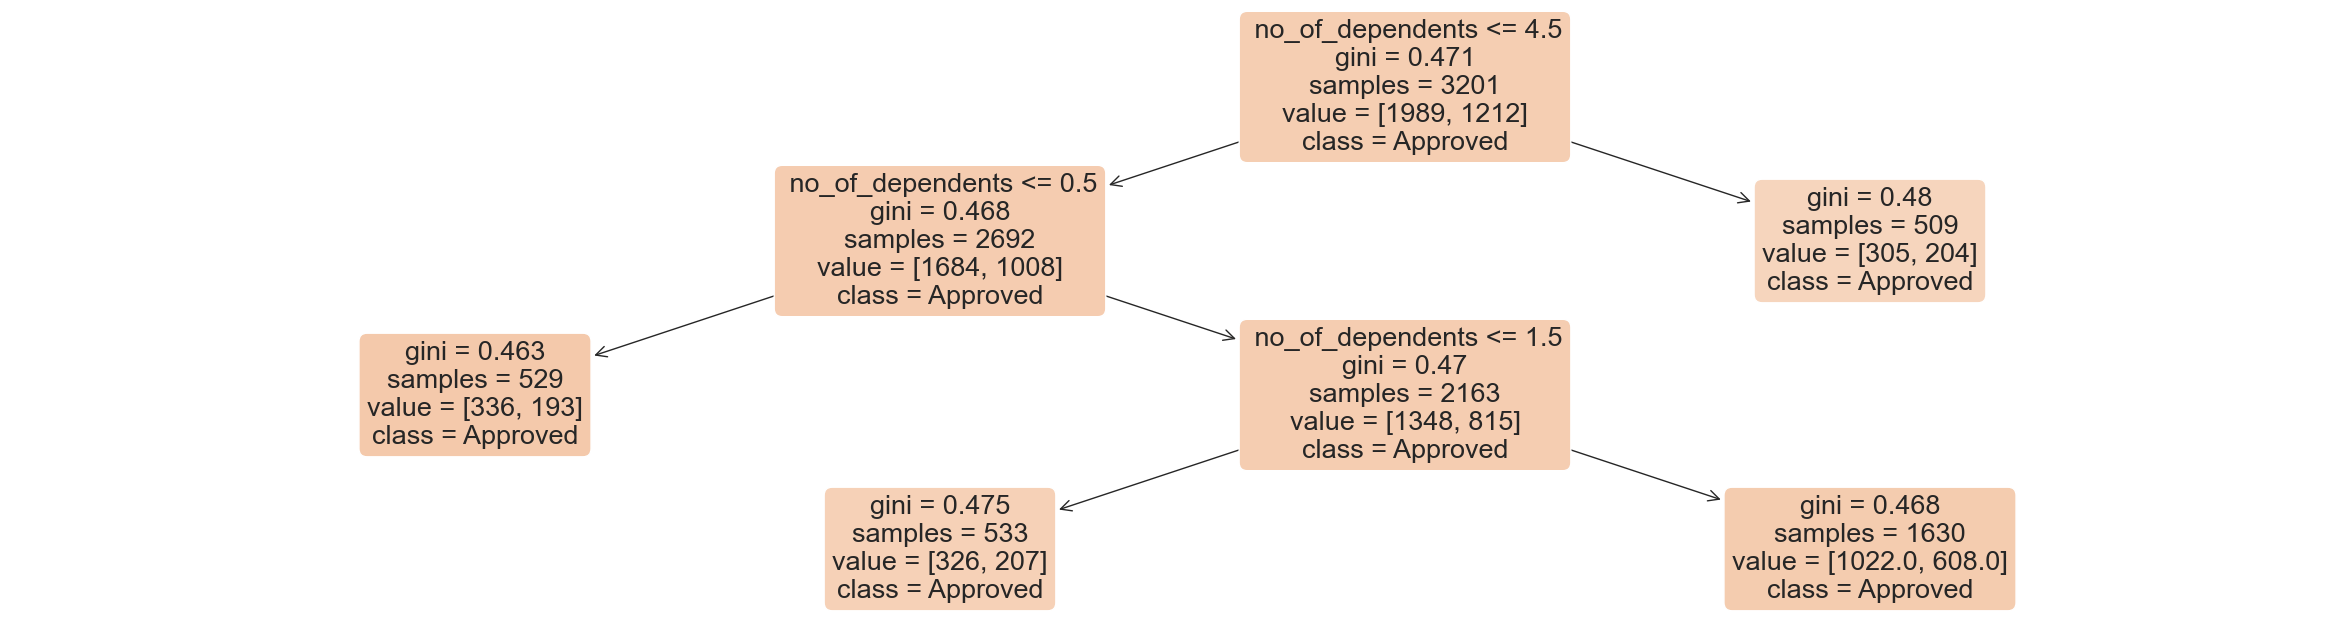

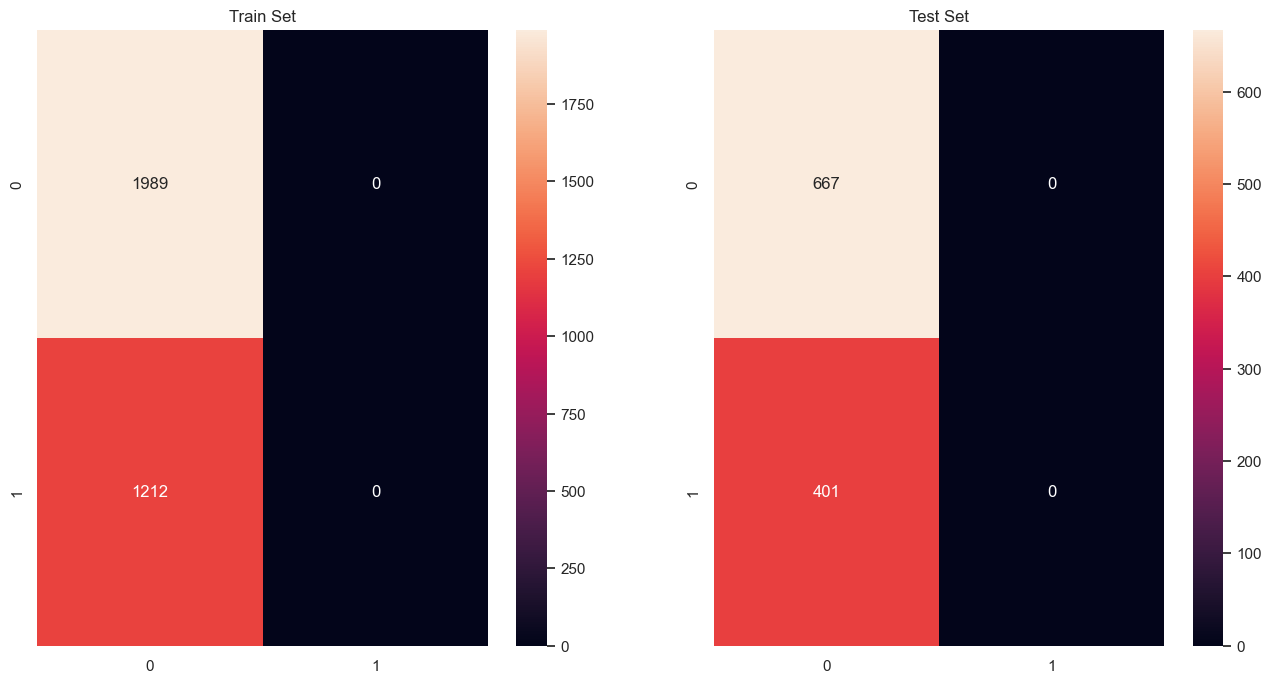

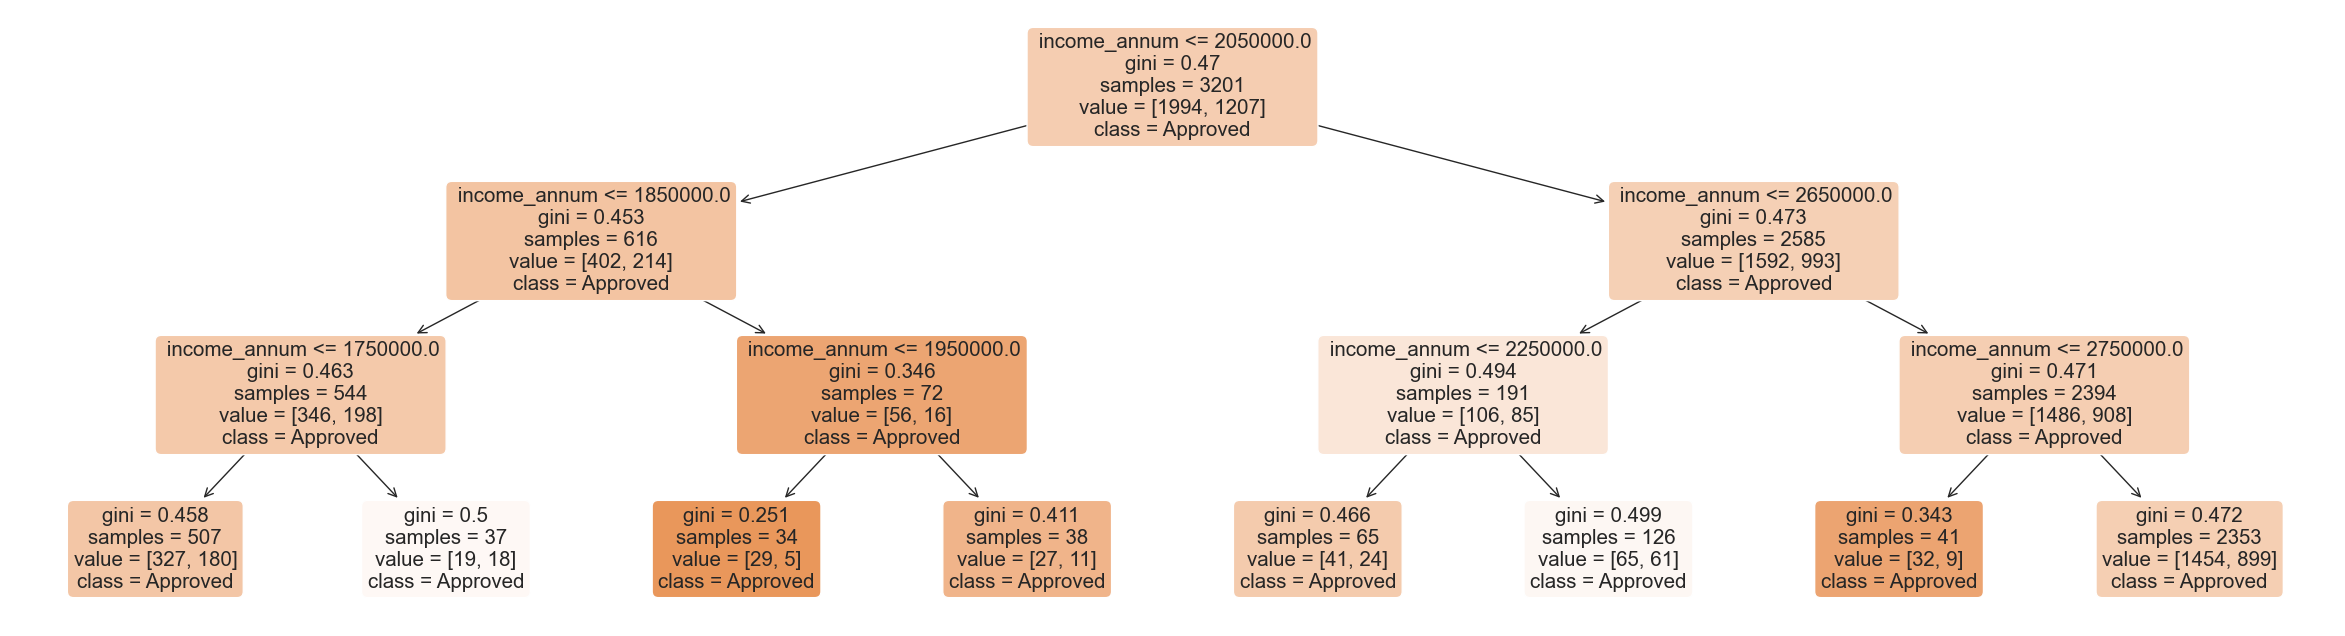

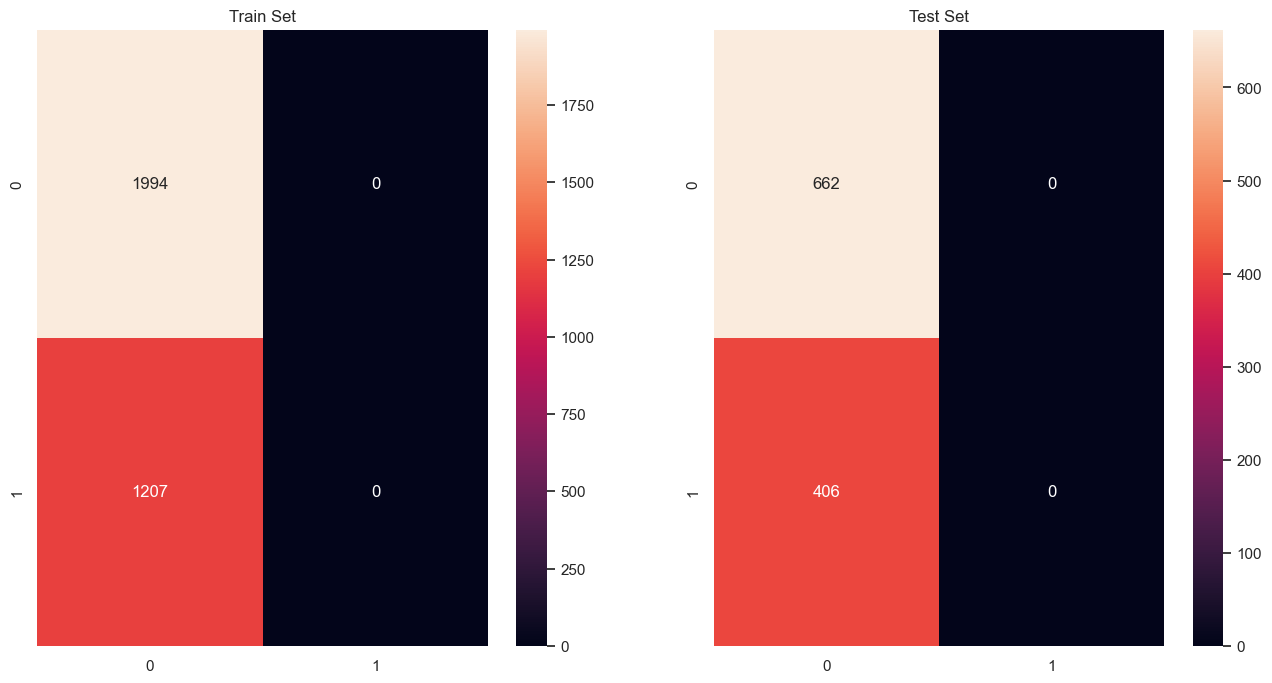

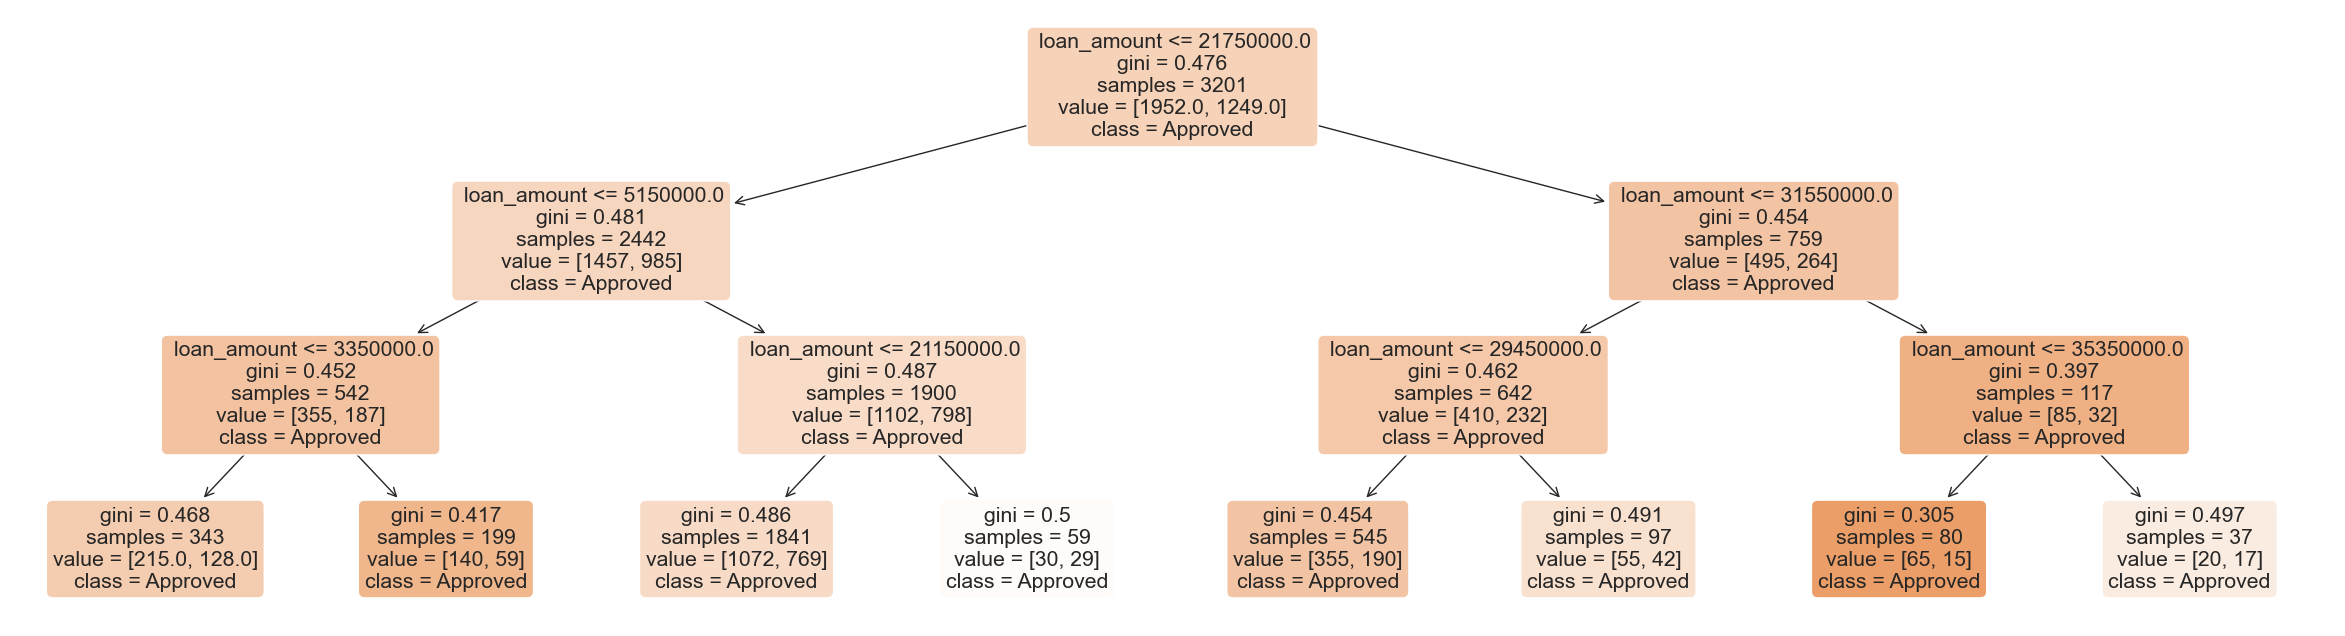

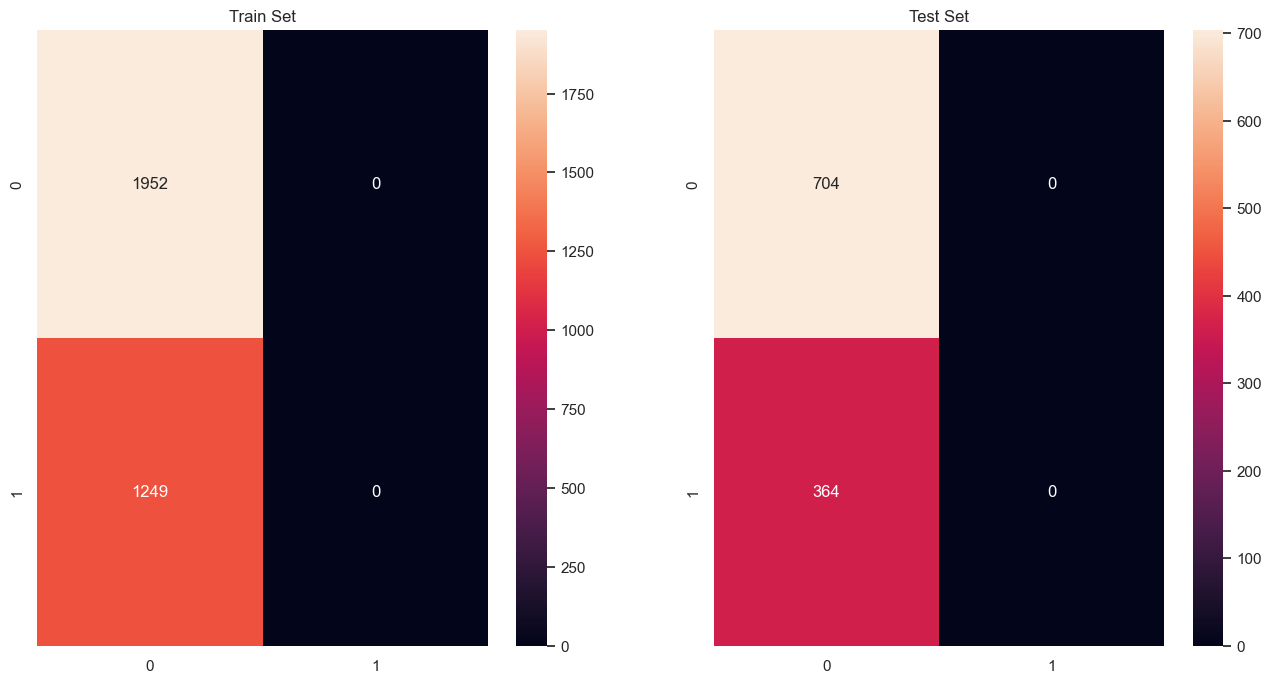

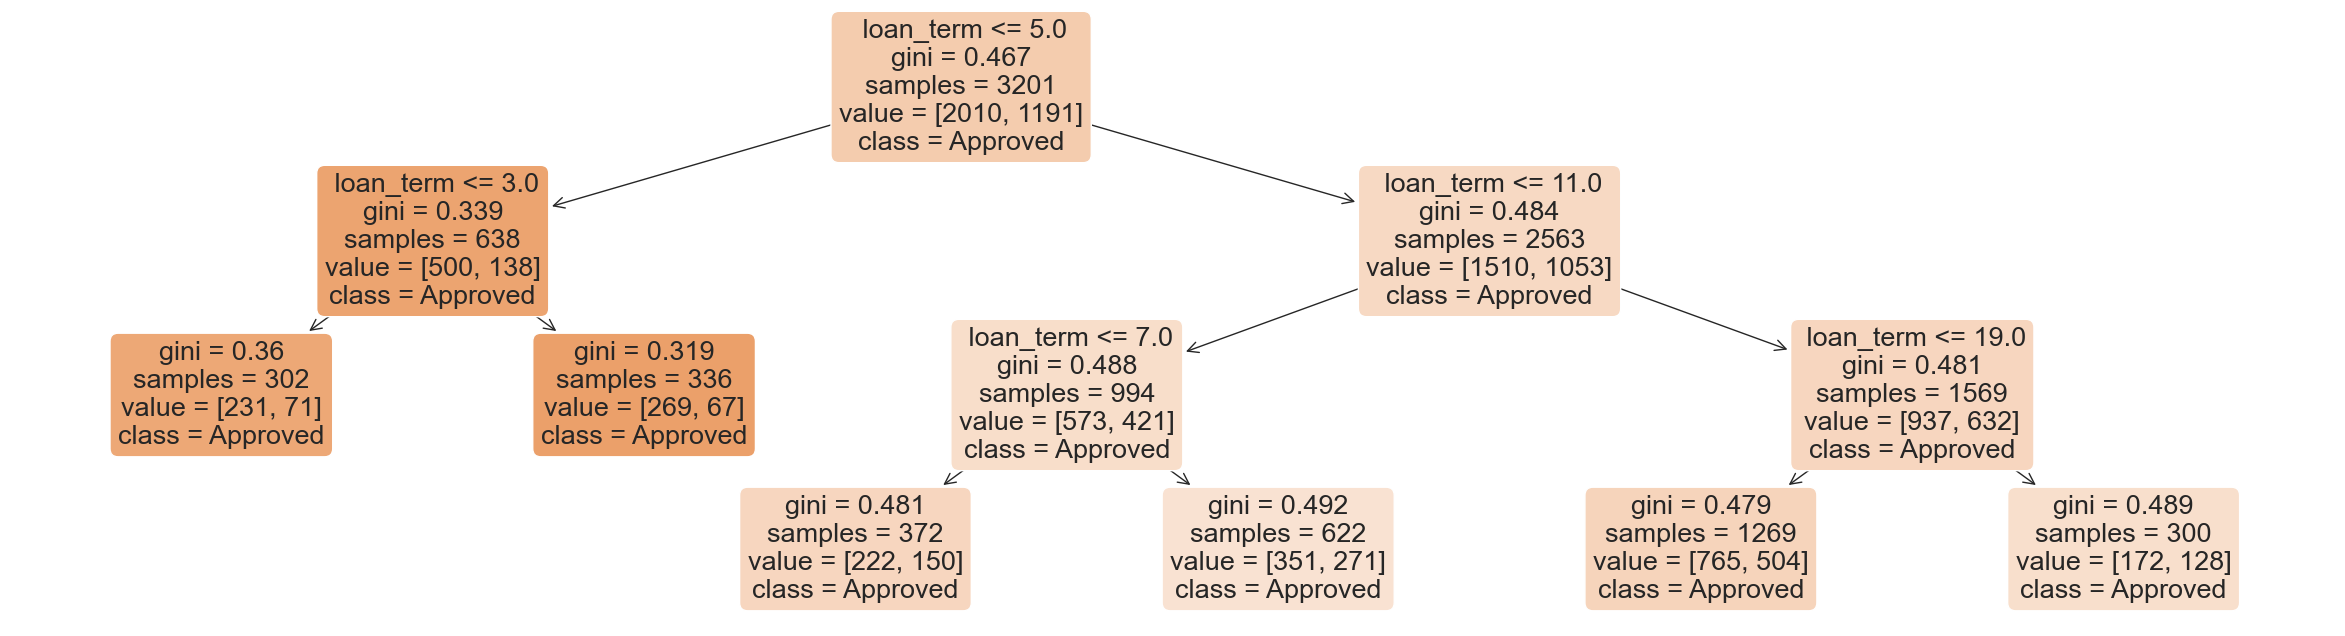

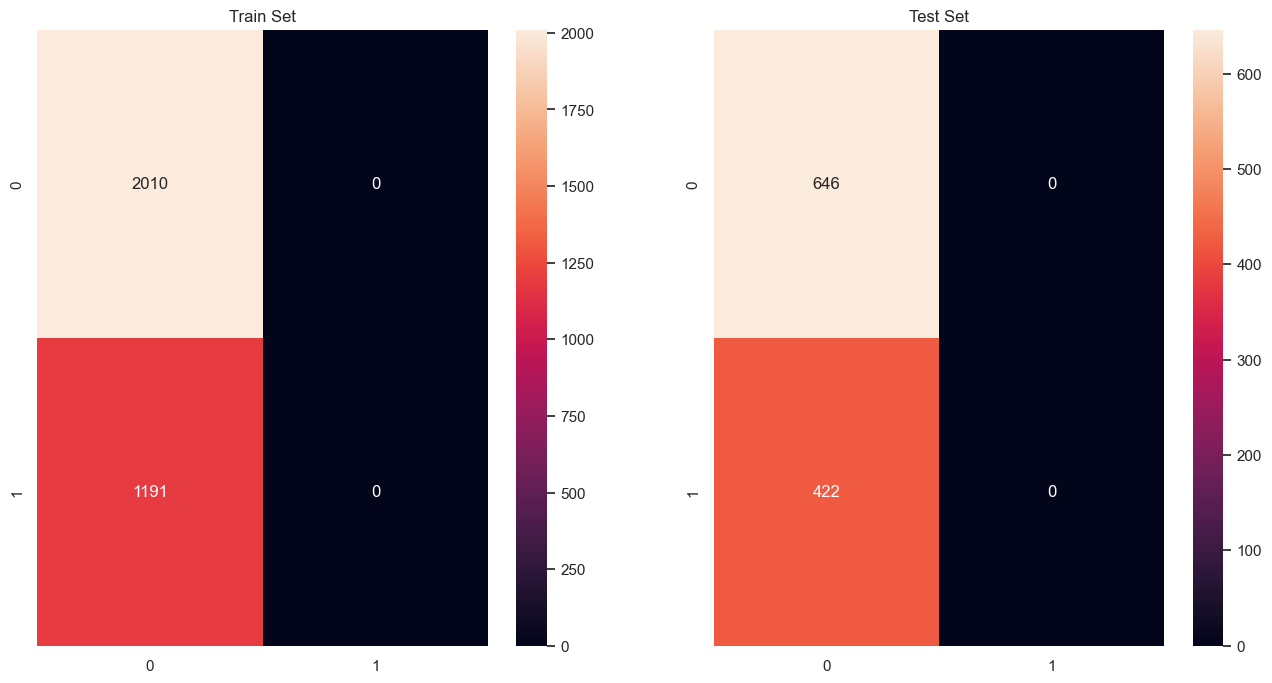

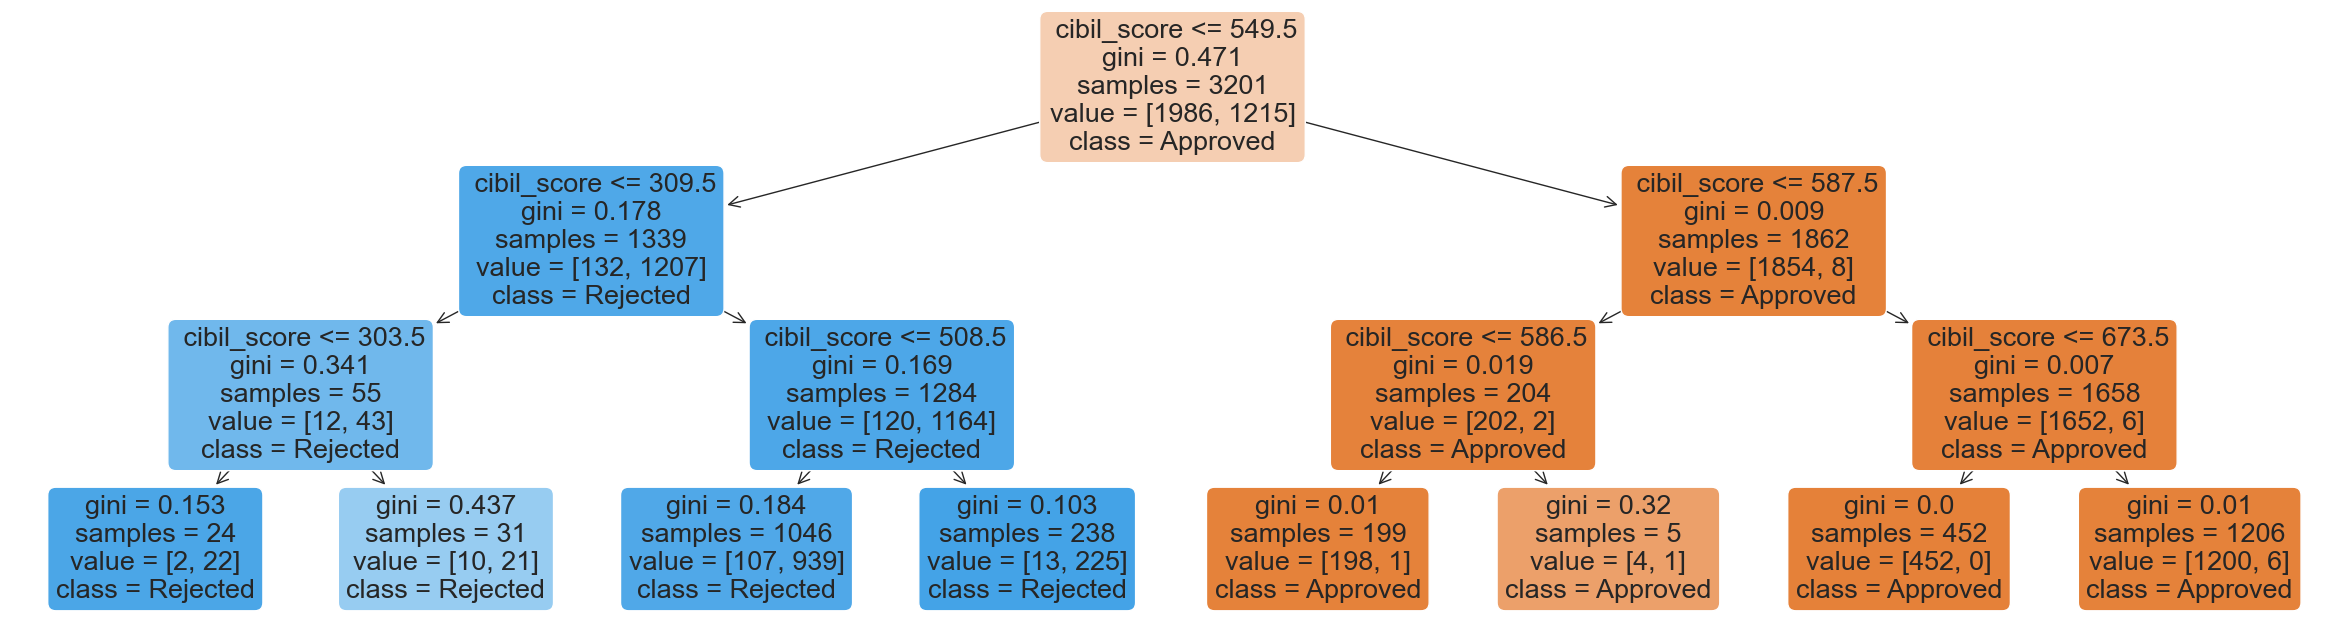

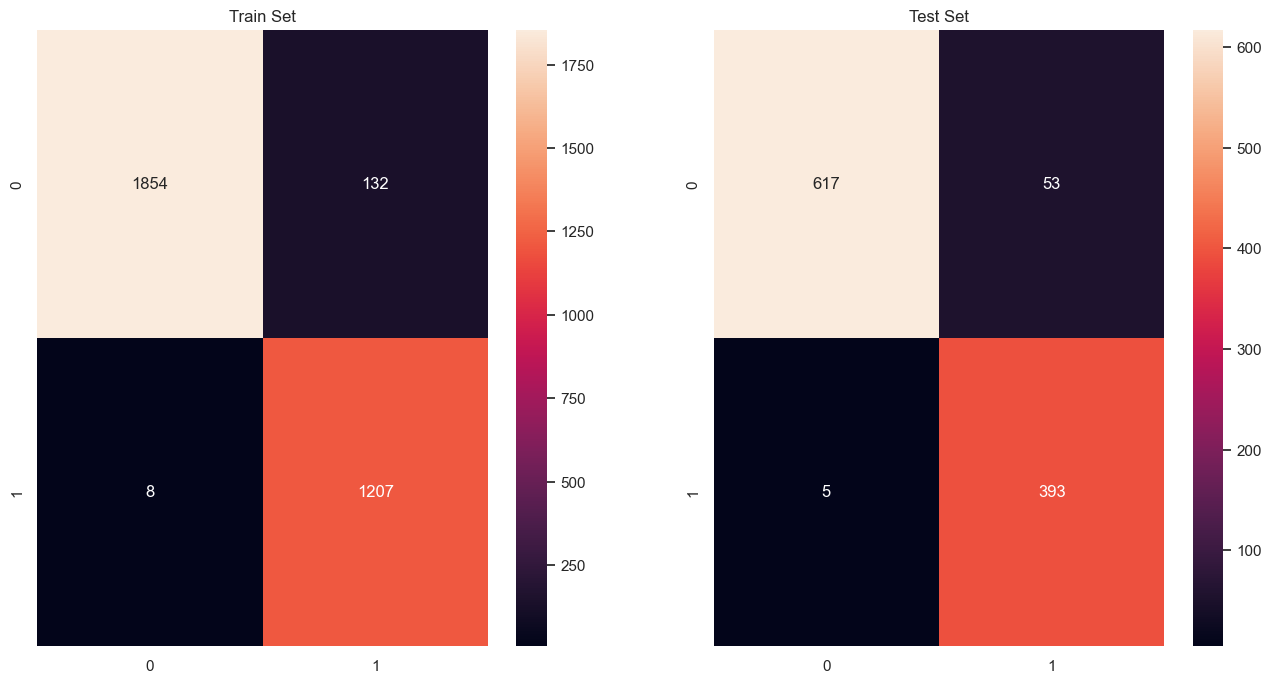

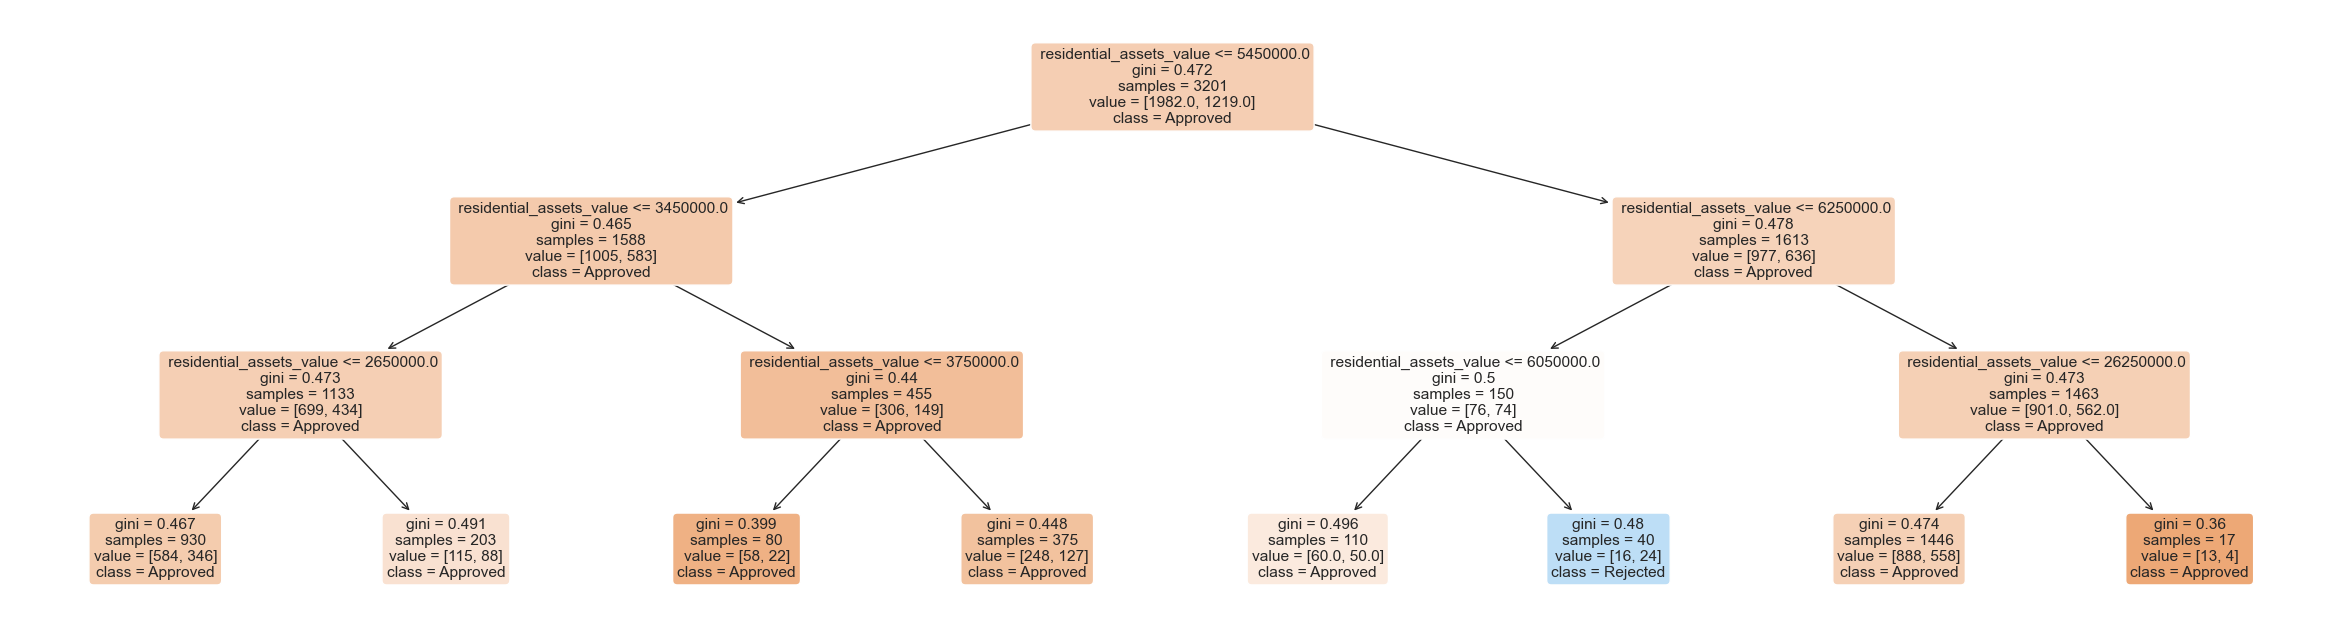

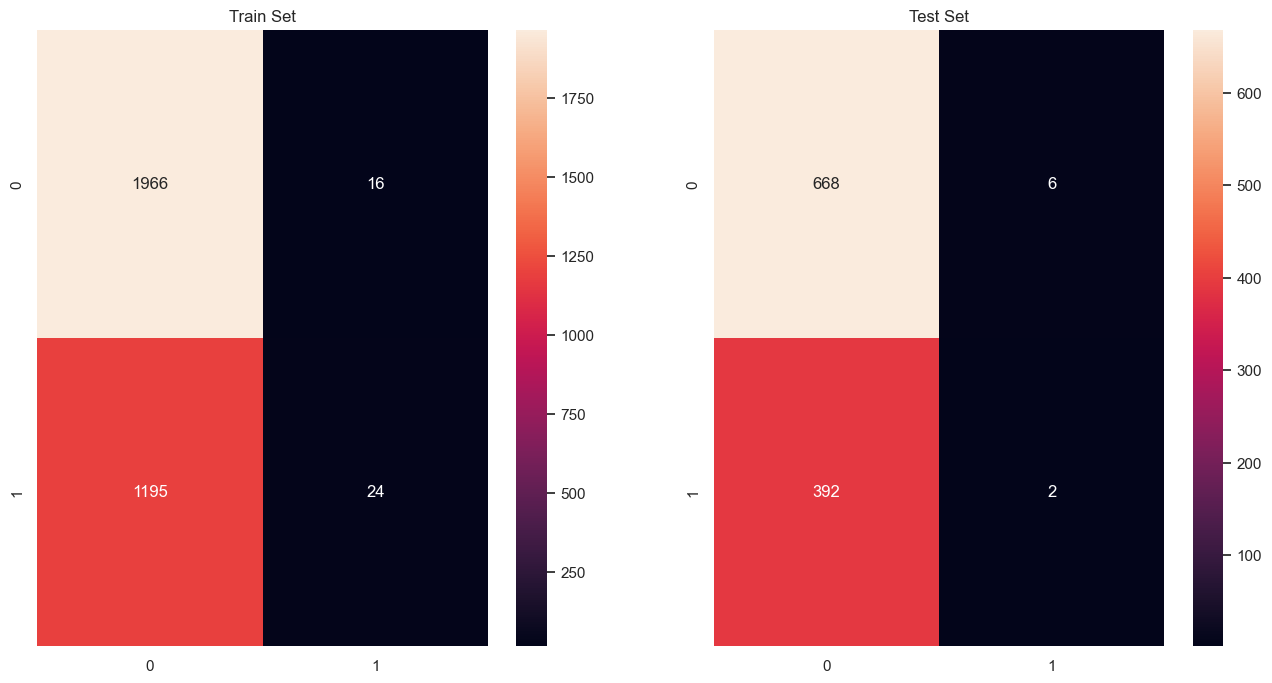

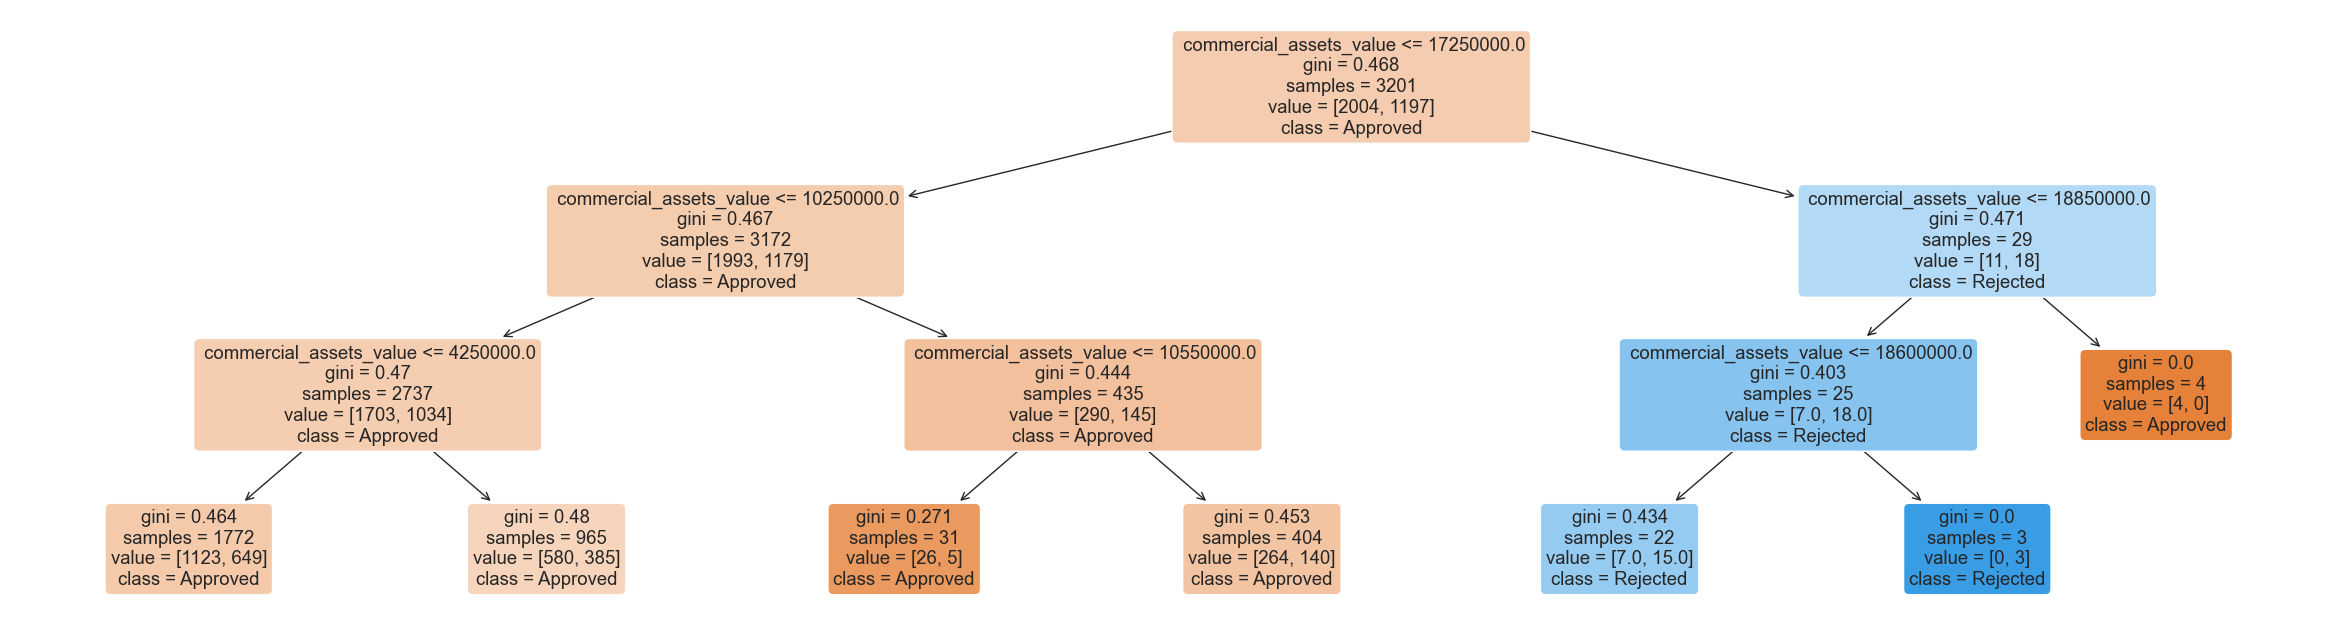

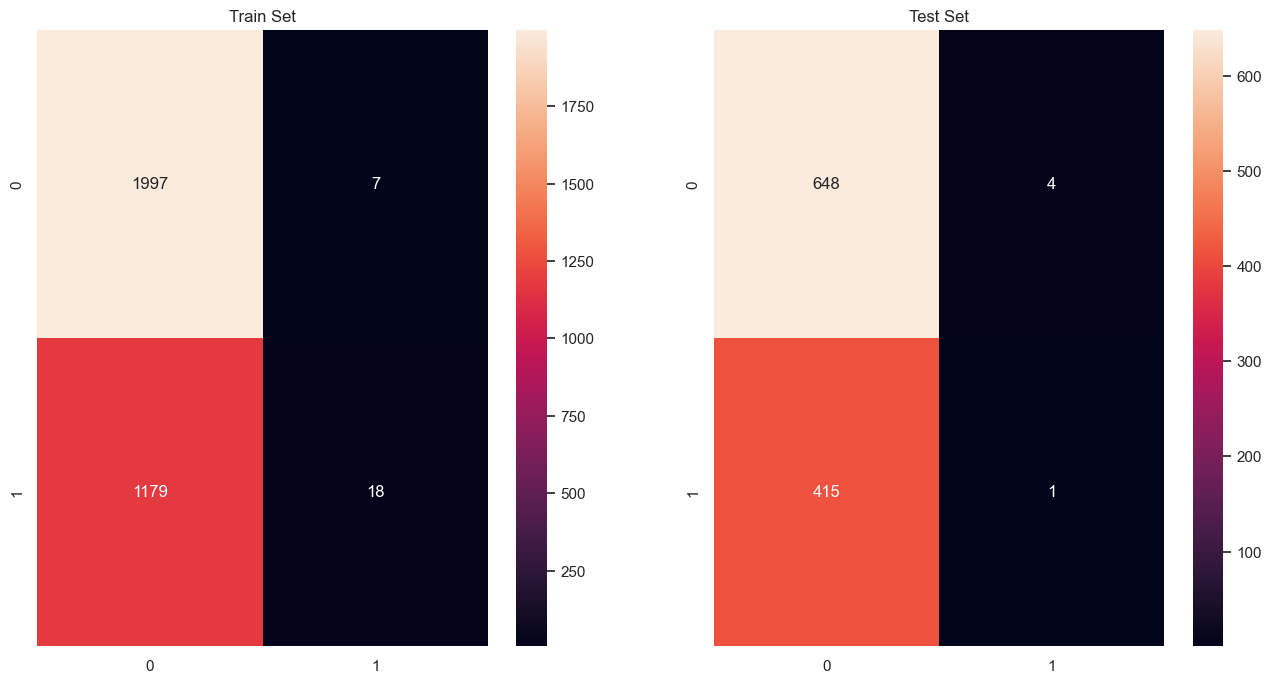

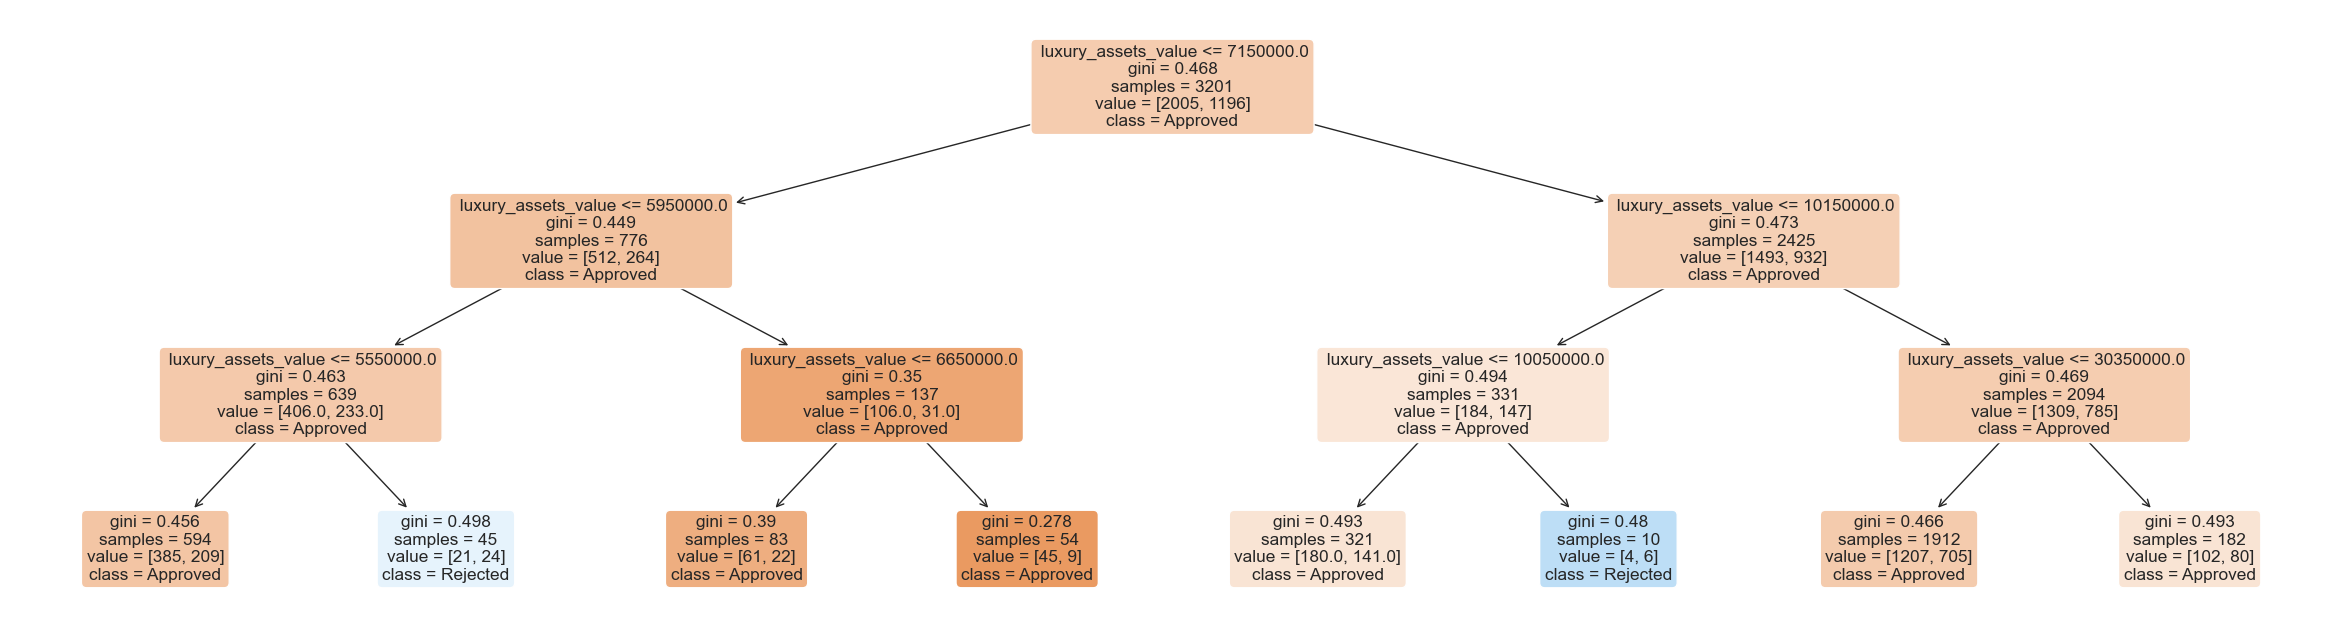

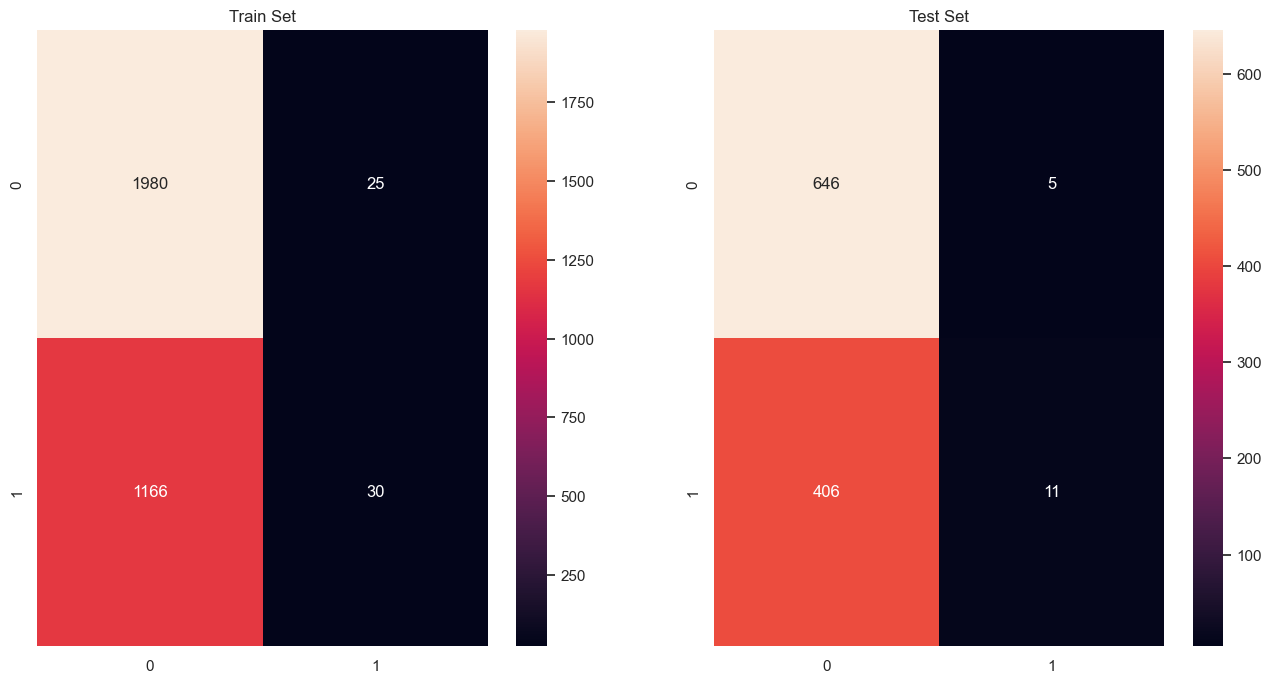

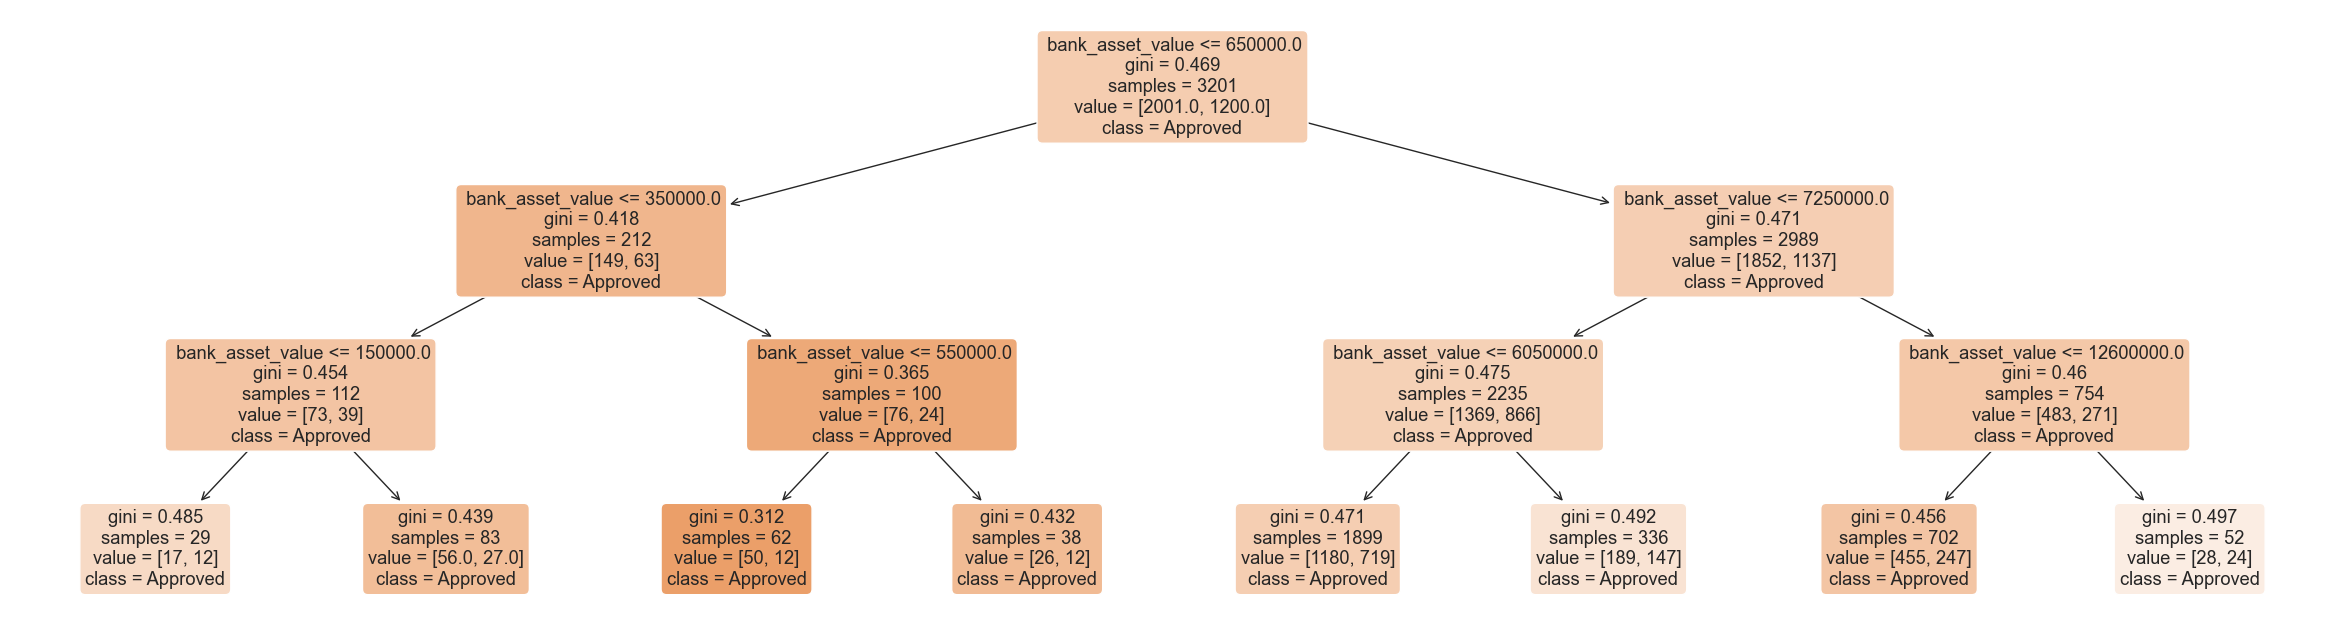

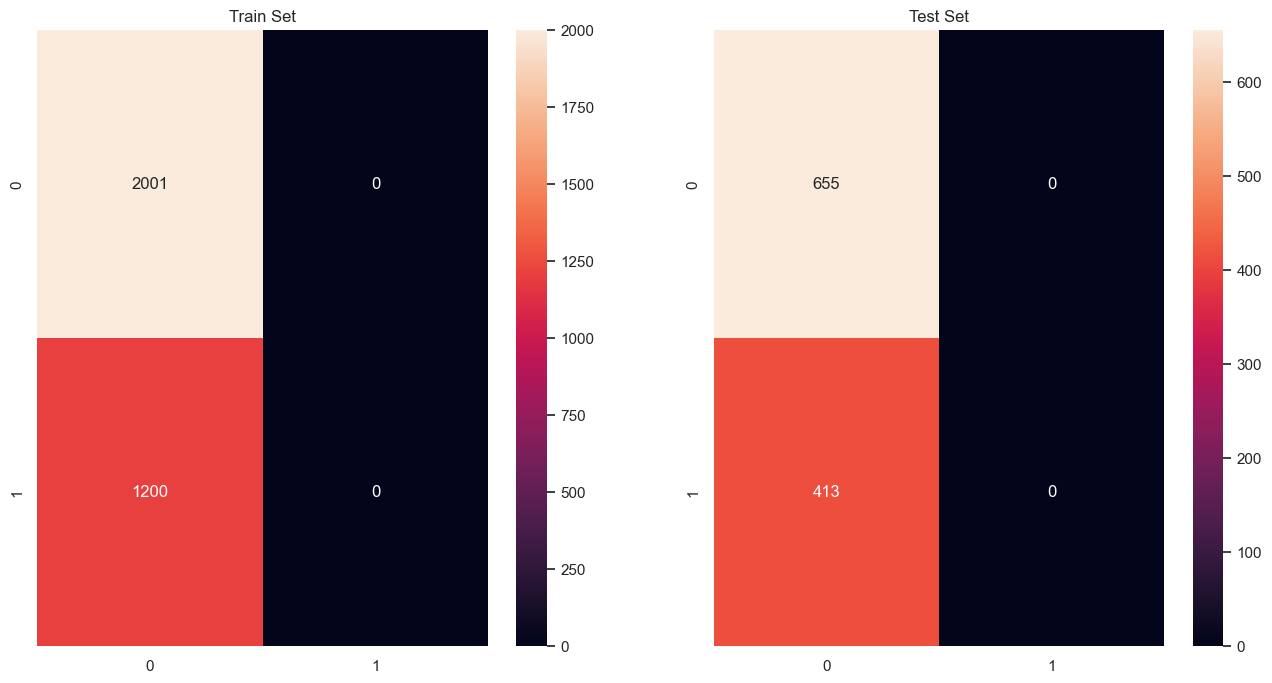

In [32]:
for i in range(len(num_data)):
    dec_tree_generator(num_data[i])